In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.decomposition import PCA
import json

In [2]:
pd.set_option('display.max_columns', 5000)

In [8]:
def get_player(playerid, matchId):

    path='data/events/'+str(matchId)+'.json'
    with open(path, 'r', encoding='utf-8') as f:
        rd = f.read()
    rd=rd[28:-2]
    print(rd)
    obj = json.loads(rd)
    dfw = pd.json_normalize(obj)
    return dfw
    dfw=dfw[dfw['player.id']==playerid]
    return dfw['player.name'].iloc[0]

In [ ]:
get_player(246,2799513)

In [4]:
lb_list=['duels', 
         'duelsWon',
         'defensiveDuels',
         'defensiveDuelsWon', 
         'passes', 
         'successfulPasses', 
         'forwardPasses', 
         'successfulForwardPasses', 
         'crosses', 
         'aerialDuels', 
         'aerialDuelsWon', 
         'defensiveActions', 
         'successfulDefensiveAction', 
         'recoveries',
         'opponentHalfRecoveries',
         'losses', 
         'ownHalfLosses',
         'dangerousOwnHalfLosses',
         'looseBallDuels',
         'looseBallDuelsWon',
         'slidingTackles',
         'successfulSlidingTackles',
         ]

In [5]:
listlb = []
for word in lb_list:
    listlb = listlb+['total.'+word]

In [6]:
len(listlb)

22

In [8]:
df=pd.read_csv('normalized_leftback.csv')

In [ ]:
print(dfref.iloc[13])
print(dfref.iloc[1])
print(dfref.iloc[11])

In [9]:
dfcalc = df[df.columns[df.columns.isin(listlb)]]

In [10]:
dfcalc[['total.losses', 'total.ownHalfLosses', 'total.dangerousOwnHalfLosses']]*=-1
df[['total.losses', 'total.ownHalfLosses', 'total.dangerousOwnHalfLosses']]*=-1

C:\Users\Rui\AppData\Local\Temp\ipykernel_33672\852176524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcalc[['total.losses', 'total.ownHalfLosses', 'total.dangerousOwnHalfLosses']]*=-1


In [134]:
get_player(285895, 2800011)

'M. Cevoli'

In [ ]:
df.iloc[843]

In [ ]:
df

In [36]:
arr=dfcalc.to_numpy()

In [16]:
arr=arr+9
arr

array([[10.06247853, 10.504306  ,  8.74700054, ...,  8.34181576,
         9.77057078,  8.59992729],
       [ 8.45372683,  8.70598555,  8.74700054, ...,  8.34181576,
         8.44349657,  8.59992729],
       [ 9.41897785,  8.70598555, 10.02541809, ...,  9.60445757,
         8.44349657,  8.59992729],
       ...,
       [ 8.7027003 ,  9.89059347,  8.07126555, ...,  9.60445757,
         9.9285558 , 10.82921068],
       [ 8.17044664,  8.73856381,  8.51910871, ...,  9.60445757,
         9.79942022,  8.59992729],
       [ 9.35529809,  8.6747647 ,  9.21575364, ...,  8.3681208 ,
         8.44349657,  8.59992729]])

In [17]:
cosine_distances = pairwise_distances(arr, metric='cosine')

In [21]:
kmeans= KMeans(n_clusters=3, init="k-means++", random_state=42, max_iter=1000)

In [22]:
kmeans.fit(cosine_distances)

c:\Users\Rui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=1000, n_clusters=3, random_state=42)

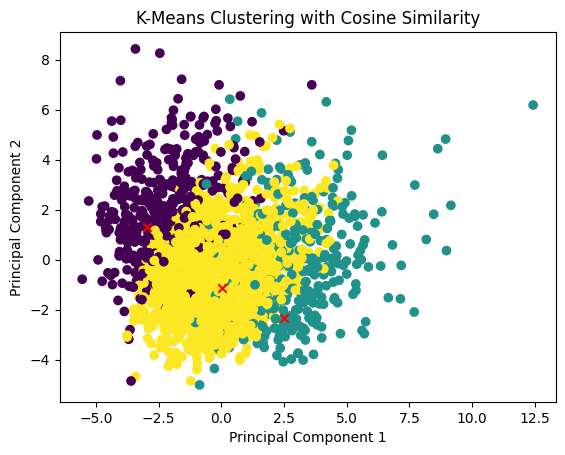

In [38]:
# Get the cluster assignments
cluster_assignments = kmeans.labels_

# Reduce dimensionality using PCA for visualization (2D)
pca = PCA(n_components=2)
data_2d = pca.fit_transform(arr)
max_index = np.argmax(data_2d[:, 0])
min_ind=np.argmin(data_2d[:,0])
# Plot the results
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=cluster_assignments, cmap='viridis')
plt.scatter(data_2d[13, 0], data_2d[13, 1], marker='x', color='red', label='purple')
plt.scatter(data_2d[1, 0], data_2d[1, 1], marker='x', color='red', label='green')
plt.scatter(data_2d[11, 0], data_2d[11, 1], marker='x', color='red', label='yellow')
#plt.scatter(data_2d[min_ind, 0], data_2d[min_ind, 1], marker='x', color='red', label='Min PC1')
plt.title('K-Means Clustering with Cosine Similarity')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.savefig('cluster3lb.jpg')
plt.show()


In [ ]:
principal_components = pca.components_

# Access the weights (loadings) of features for the first principal component (PC1)
weights_pc1 = principal_components[0, :]

# Create a dictionary with feature names and their corresponding weights
feature_weights = dict(zip(range(1, len(weights_pc1) + 1), weights_pc1))

# Print feature weights for PC1
print("Feature weights for PC1:")
for feature, weight in sorted(feature_weights.items(), key=lambda x: abs(x[1]), reverse=True):
    print(f"Feature {feature}: {weight}")

In [51]:
pd.set_option('display.max_columns', 5000)

In [25]:
cluster_lists = [[] for _ in range(3)]

# Populate lists with indices
for i, label in enumerate(cluster_assignments):
    cluster_lists[label].append(i)

In [41]:
meanarr=dfcalc.to_numpy()
for i in range(3):

    selected_rows = meanarr[cluster_lists[i], :]

    selected_rows = dfcalc.iloc[cluster_lists[i]]

    # Calculate the mean of every column separately for the selected rows
    column_means = selected_rows.mean()

    print("Mean of every column separately:",i)
    print(column_means)

Mean of every column separately: 0
total.duels                       -0.488097
total.duelsWon                    -0.019929
total.defensiveDuels              -0.797705
total.defensiveDuelsWon           -0.368712
total.aerialDuels                 -0.056811
total.aerialDuelsWon               0.072224
total.passes                       1.338286
total.successfulPasses             1.343367
total.crosses                      0.923444
total.forwardPasses                0.901707
total.successfulForwardPasses      1.054801
total.defensiveActions            -0.925282
total.successfulDefensiveAction   -0.848020
total.looseBallDuels              -0.086224
total.looseBallDuelsWon           -0.093005
total.recoveries                   0.044916
total.opponentHalfRecoveries       0.615579
total.losses                       0.099329
total.ownHalfLosses                0.697437
total.dangerousOwnHalfLosses       0.357203
total.slidingTackles              -0.359996
total.successfulSlidingTackles    -0.2518

In [34]:
cluster_lists[2]

[0,
 1,
 2,
 3,
 4,
 5,
 7,
 9,
 10,
 12,
 14,
 18,
 20,
 21,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 43,
 45,
 46,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 69,
 70,
 71,
 72,
 73,
 76,
 77,
 83,
 84,
 86,
 89,
 91,
 93,
 94,
 95,
 96,
 98,
 99,
 100,
 101,
 102,
 104,
 105,
 106,
 108,
 110,
 111,
 113,
 114,
 115,
 119,
 120,
 121,
 122,
 123,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 138,
 142,
 143,
 145,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 164,
 165,
 166,
 169,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 180,
 185,
 187,
 188,
 189,
 190,
 192,
 193,
 194,
 197,
 201,
 202,
 203,
 204,
 205,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 217,
 218,
 219,
 220,
 221,
 223,
 225,
 226,
 230,
 231,
 232,
 233,
 234,
 237,
 238,
 239,
 240,
 241,
 242,
 245,
 246,
 247,
 248,
 249,
 251,
 252,
 255,
 256,
 257,
 260,
 261

c:\Users\Rui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
c:\Users\Rui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
c:\Users\Rui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
c:\Users\Rui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
c:\Users\Rui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm

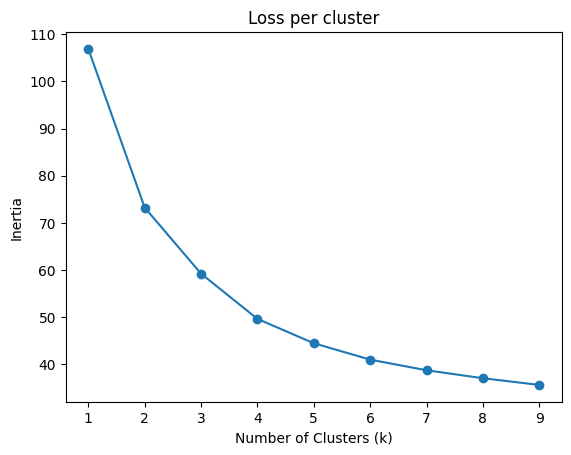

In [177]:
k_values = range(1, 10)

# Calculate and store the inertia for each k
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42, algorithm='auto')
    cosine_distances = pairwise_distances(arr, metric='cosine')
    kmeans.fit(cosine_distances)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.title('Loss per cluster')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.savefig('elbowlb.jpg')
plt.show()